In [ ]:
# Train EDA

In [1]:
# HW1: Surgical Tool Detection - Exploratory Data Analysis

import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Paths
IMG_DIR = "/datashare/HW1/labeled_image_data/images/train"
LBL_DIR = "/datashare/HW1/labeled_image_data/labels/train"
CLASS_FILE = "/datashare/HW1/labeled_image_data/classes.txt"

# Load class names
with open(CLASS_FILE, 'r') as f:
    CLASS_NAMES = [line.strip() for line in f]
NUM_CLASSES = len(CLASS_NAMES)

print(f"Classes ({NUM_CLASSES}): {CLASS_NAMES}")


Classes (3): ['Empty', 'Tweezers', 'Needle_driver']


Image: a1dc1506-output_0260.png


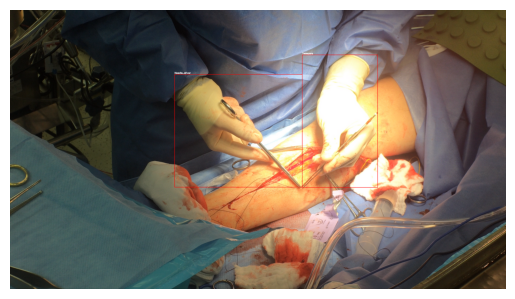

Image: b1dca007-frame_5216.jpg


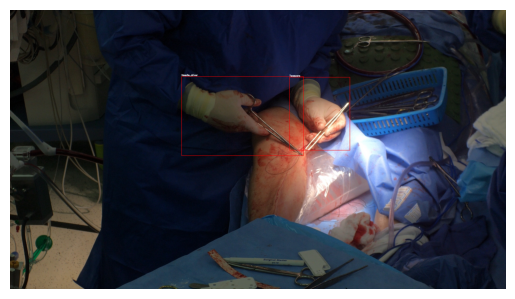

Image: 5b645b2f-frame_0895.jpg


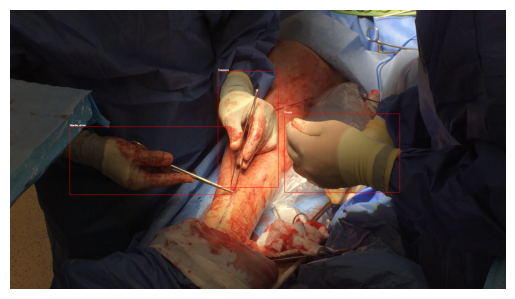

Image: 1e81deb4-frame_3428.jpg


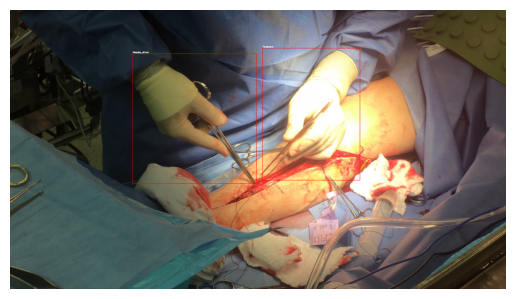

Image: 235695d5-output_0348.png


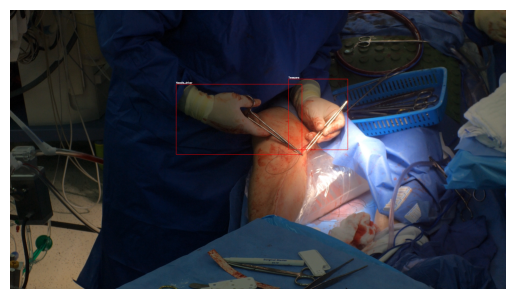

In [2]:
def plot_image_with_labels(img_path, label_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                cls_id, x, y, bw, bh = int(parts[0]), float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])
                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image, CLASS_NAMES[cls_id], (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Show 5 random labeled images
random_images = random.sample(os.listdir(IMG_DIR), 5)
for fname in random_images:
    img_path = os.path.join(IMG_DIR, fname)
    lbl_path = os.path.join(LBL_DIR, os.path.splitext(fname)[0] + ".txt")
    print(f"Image: {fname}")
    plot_image_with_labels(img_path, lbl_path)


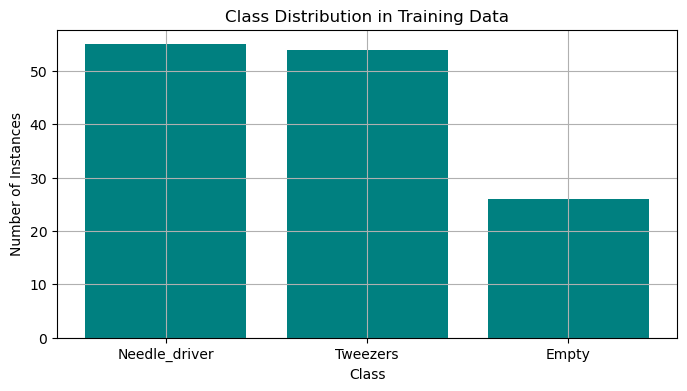

In [3]:
from collections import Counter
label_counts = Counter()

for file in os.listdir(LBL_DIR):
    with open(os.path.join(LBL_DIR, file), 'r') as f:
        for line in f:
            cls_id = int(line.strip().split()[0])
            label_counts[cls_id] += 1

# Convert to dict with class names
named_counts = {CLASS_NAMES[k]: v for k, v in label_counts.items()}

plt.figure(figsize=(8, 4))
plt.bar(named_counts.keys(), named_counts.values(), color='teal')
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.grid(True)
plt.show()


In [4]:
print("💡 Insights:")

total_labels = sum(label_counts.values())
avg_labels_per_image = total_labels / len(os.listdir(LBL_DIR))
max_class = CLASS_NAMES[max(label_counts, key=label_counts.get)]
min_class = CLASS_NAMES[min(label_counts, key=label_counts.get)]

print(f"- Total labeled images: {len(os.listdir(IMG_DIR))}")
print(f"- Total bounding boxes: {total_labels}")
print(f"- Average boxes per image: {avg_labels_per_image:.2f}")
print(f"- Most frequent class: {max_class}")
print(f"- Least frequent class: {min_class}")


💡 Insights:
- Total labeled images: 61
- Total bounding boxes: 135
- Average boxes per image: 2.21
- Most frequent class: Needle_driver
- Least frequent class: Empty


In [ ]:
# Val EDA

In [5]:
# HW1: Surgical Tool Detection - Exploratory Data Analysis

import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Paths
IMG_DIR = "/datashare/HW1/labeled_image_data/images/val"
LBL_DIR = "/datashare/HW1/labeled_image_data/labels/val"
CLASS_FILE = "/datashare/HW1/labeled_image_data/classes.txt"

# Load class names
with open(CLASS_FILE, 'r') as f:
    CLASS_NAMES = [line.strip() for line in f]
NUM_CLASSES = len(CLASS_NAMES)

print(f"Classes ({NUM_CLASSES}): {CLASS_NAMES}")


Classes (3): ['Empty', 'Tweezers', 'Needle_driver']


Image: de6b6a6c-frame_2683.jpg


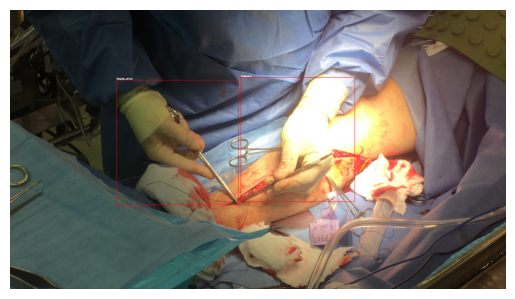

Image: e45c81ac-frame_2087.jpg


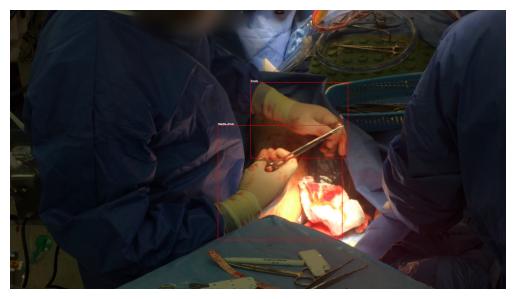

Image: fa8dd0cd-frame_1640.jpg


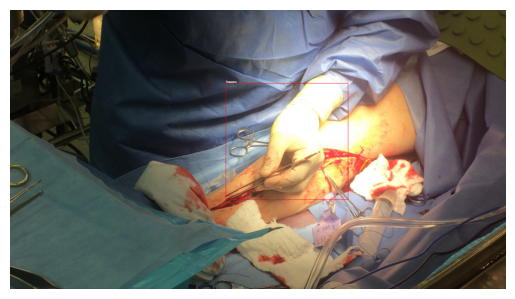

Image: ff8c22da-output_0182.png


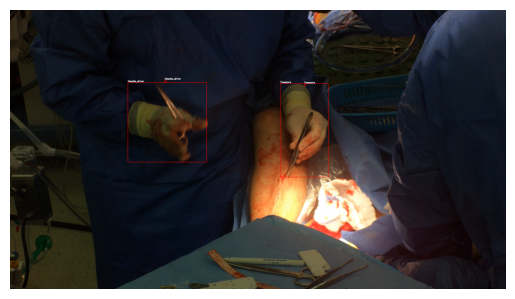

Image: ea798a63-output_0123.png


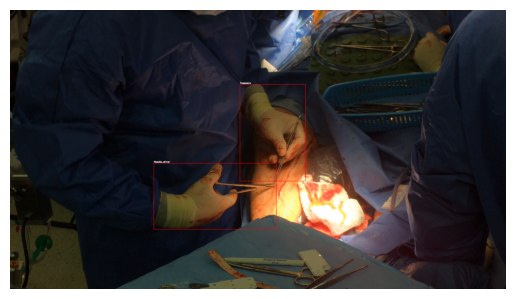

In [6]:
def plot_image_with_labels(img_path, label_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                cls_id, x, y, bw, bh = int(parts[0]), float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])
                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image, CLASS_NAMES[cls_id], (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Show 5 random labeled images
random_images = random.sample(os.listdir(IMG_DIR), 5)
for fname in random_images:
    img_path = os.path.join(IMG_DIR, fname)
    lbl_path = os.path.join(LBL_DIR, os.path.splitext(fname)[0] + ".txt")
    print(f"Image: {fname}")
    plot_image_with_labels(img_path, lbl_path)


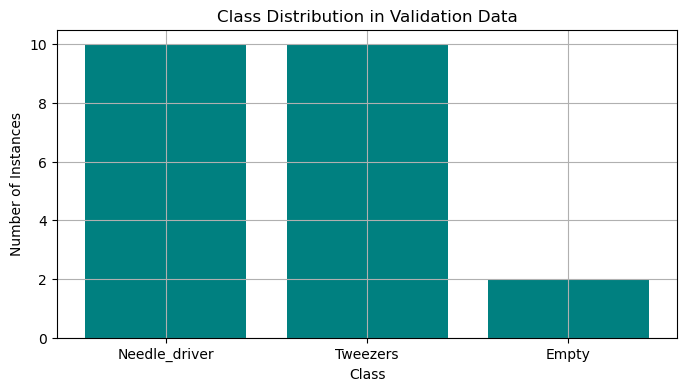

In [7]:
from collections import Counter
label_counts = Counter()

for file in os.listdir(LBL_DIR):
    with open(os.path.join(LBL_DIR, file), 'r') as f:
        for line in f:
            cls_id = int(line.strip().split()[0])
            label_counts[cls_id] += 1

# Convert to dict with class names
named_counts = {CLASS_NAMES[k]: v for k, v in label_counts.items()}

plt.figure(figsize=(8, 4))
plt.bar(named_counts.keys(), named_counts.values(), color='teal')
plt.title("Class Distribution in Validation Data")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.grid(True)
plt.show()


In [8]:
print("💡 Insights:")

total_labels = sum(label_counts.values())
avg_labels_per_image = total_labels / len(os.listdir(LBL_DIR))
max_class = CLASS_NAMES[max(label_counts, key=label_counts.get)]
min_class = CLASS_NAMES[min(label_counts, key=label_counts.get)]

print(f"- Total labeled images: {len(os.listdir(IMG_DIR))}")
print(f"- Total bounding boxes: {total_labels}")
print(f"- Average boxes per image: {avg_labels_per_image:.2f}")
print(f"- Most frequent class: {max_class}")
print(f"- Least frequent class: {min_class}")


💡 Insights:
- Total labeled images: 10
- Total bounding boxes: 22
- Average boxes per image: 2.20
- Most frequent class: Needle_driver
- Least frequent class: Empty
